## Simulation video making on a simple mesh

[[  0.   0.   0.]
 [  0.  10.   0.]
 [ 10.   0.   0.]
 [ 10.  10.   0.]
 [  0.  20.   0.]
 [ 10.  20.   0.]
 [ 20.   0.   0.]
 [ 20.  10.   0.]
 [  0.  30.   0.]
 [ 10.  30.   0.]
 [ 20.  20.   0.]
 [ 30.   0.   0.]
 [ 30.  10.   0.]
 [  0.  40.   0.]
 [ 10.  40.   0.]
 [ 20.  30.   0.]
 [ 30.  20.   0.]
 [ 40.   0.   0.]
 [ 40.  10.   0.]
 [  0.  50.   0.]
 [ 10.  50.   0.]
 [ 20.  40.   0.]
 [ 30.  30.   0.]
 [ 40.  20.   0.]
 [ 50.   0.   0.]
 [ 50.  10.   0.]
 [  0.  60.   0.]
 [ 10.  60.   0.]
 [ 20.  50.   0.]
 [ 30.  40.   0.]
 [ 40.  30.   0.]
 [ 50.  20.   0.]
 [ 60.   0.   0.]
 [ 60.  10.   0.]
 [  0.  70.   0.]
 [ 10.  70.   0.]
 [ 20.  60.   0.]
 [ 30.  50.   0.]
 [ 40.  40.   0.]
 [ 50.  30.   0.]
 [ 60.  20.   0.]
 [ 70.   0.   0.]
 [ 70.  10.   0.]
 [  0.  80.   0.]
 [ 10.  80.   0.]
 [ 20.  70.   0.]
 [ 30.  60.   0.]
 [ 40.  50.   0.]
 [ 50.  40.   0.]
 [ 60.  30.   0.]
 [ 70.  20.   0.]
 [ 80.   0.   0.]
 [ 80.  10.   0.]
 [  0.  90.   0.]
 [ 10.  90.   0.]
 [ 20.  80

error: XDG_RUNTIME_DIR is invalid or not set in the environment.
MESA: error: ZINK: failed to choose pdev
glx: failed to create drisw screen


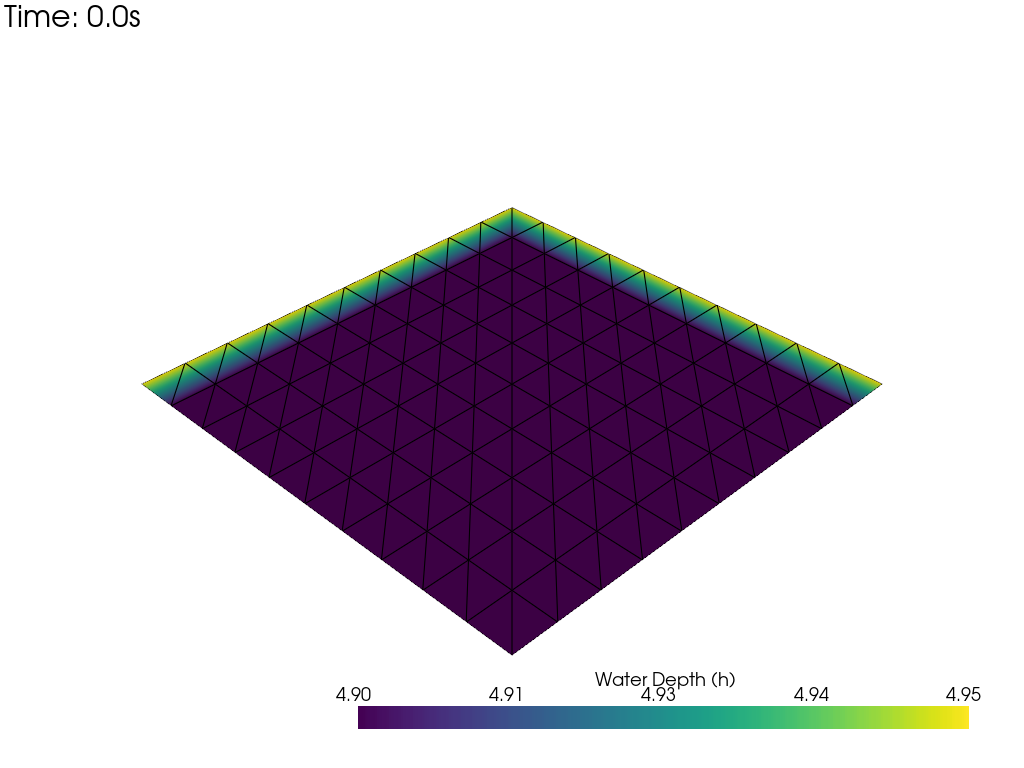

[5.05       5.05       5.05       4.84251169 5.05       4.8831802
 5.05       4.8831802  5.05       4.87204661 4.9134495  5.05
 4.87204661 5.05       4.87521799 4.90510815 4.90510815 5.05
 4.87521799 5.05       4.87428383 4.90749763 4.89601519 4.90749763
 5.05       4.87428383 5.05       4.87456637 4.90679061 4.89861604
 4.89861604 4.90679061 5.05       4.87456637 5.05       4.8744792
 4.90700518 4.89784728 4.90115703 4.89784728 4.90700518 5.05
 4.8744792  5.05       4.87450652 4.90693882 4.89808043 4.90040591
 4.90040591 4.89808043 4.90693882 5.05       4.87450652 5.05
 4.87449768 4.90695965 4.89800834 4.9006337  4.89964953 4.9006337
 4.89800834 4.90695965 5.05       4.87449768 5.05       4.87450144
 4.9069529  4.89803097 4.90056328 4.89987894 4.89987894 4.90056328
 4.89803097 4.9069529  5.05       4.87450144 4.90695578 4.89802365
 4.90058539 4.89980801 4.90010785 4.89980801 4.90058539 4.89802365
 4.90695578 4.89802677 4.90057823 4.89983028 4.90003708 4.90003708
 4.89983028 4.90057823

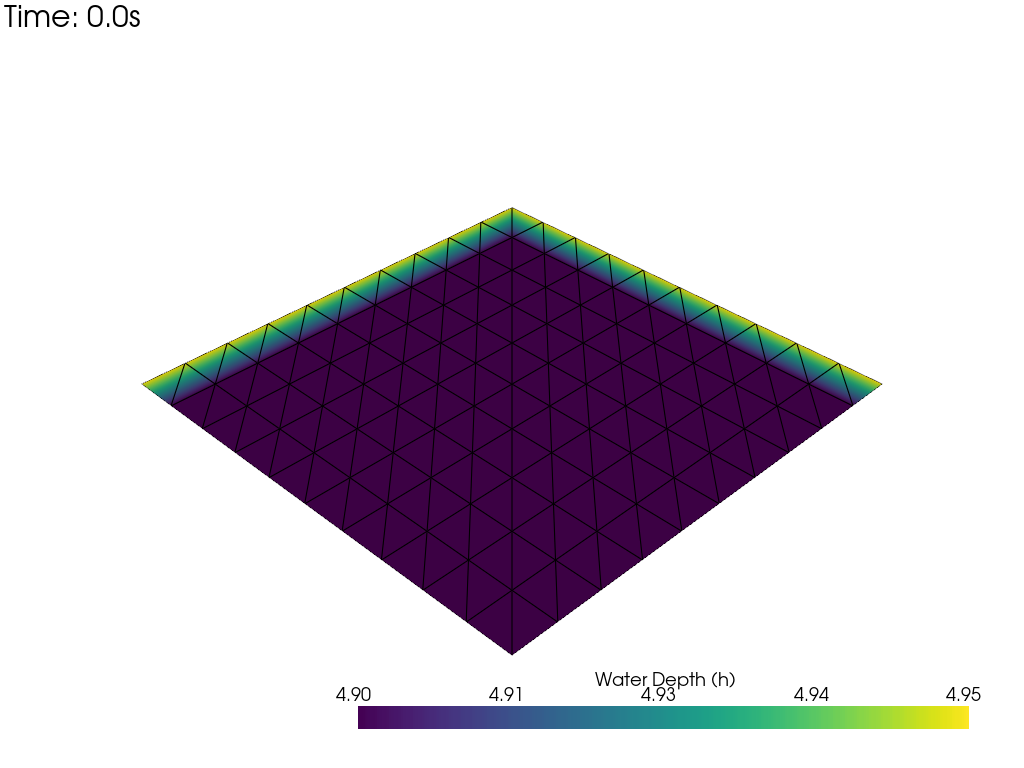

[5.05       5.05       5.05       4.84600085 5.05       4.88461449
 5.05       4.88461449 5.05       4.87305664 4.91385652 5.05
 4.87305664 5.05       4.87684254 4.90496095 4.90496095 5.05
 4.87684254 5.05       4.87554165 4.90789999 4.8952989  4.90789999
 5.05       4.87554165 5.05       4.87599723 4.90688699 4.898485
 4.898485   4.90688699 5.05       4.87599723 5.05       4.87583705
 4.9072418  4.89738712 4.90159056 4.89738712 4.9072418  5.05
 4.87583705 5.05       4.8758933  4.90711719 4.89777187 4.90052057
 4.90052057 4.89777187 4.90711719 5.05       4.8758933  5.05
 4.87587317 4.90716088 4.89763663 4.90089543 4.89944088 4.90089543
 4.89763663 4.90716088 5.05       4.87587317 5.05       4.87588284
 4.90714527 4.89768409 4.90076372 4.89981919 4.89981919 4.90076372
 4.89768409 4.90714527 5.05       4.87588284 4.90715275 4.89766712
 4.90080993 4.89968624 4.90019627 4.89968624 4.90080993 4.89766712
 4.90715275 4.89767527 4.90079341 4.89973289 4.90006376 4.90006376
 4.89973289 4.9007934

KeyboardInterrupt: 

In [3]:
import numpy as np
from mpi4py import MPI
from dolfinx import mesh, fem, nls, io
from dolfinx.fem.petsc import NonlinearProblem
from dolfinx.nls.petsc import NewtonSolver
from dolfinx.fem import locate_dofs_geometrical
from petsc4py.PETSc import ScalarType
from ufl import TrialFunction, TestFunction, div, dx
from ufl.finiteelement import FiniteElement, MixedElement
import ufl
import basix
from dolfinx.plot import vtk_mesh
import pyvista as pv
import os

# Create a directory to store frames
os.makedirs("frames", exist_ok=True)

# Domain parameters
Lx, Ly = 100.0, 100.0
nx, ny = 10, 10

# Physical parameters
g = 9.81  # Gravitational constant
n = 0.03  # Manning's coefficient
# Time-stepping loop
t, dt, T = 0.0, 0.1, 10.0
num_steps = int(T / dt)
domain = mesh.create_rectangle(MPI.COMM_WORLD, [np.array([0.0, 0.0]), np.array([Lx, Ly])], [nx, ny], cell_type=mesh.CellType.quadrilateral)
domain.topology.create_connectivity(domain.topology.dim - 1, domain.topology.dim)
# Access the coordinates of the vertices
x = domain.geometry.x
# Print coordinates
print(x)  # This will print all coordinates in the mesh

# Mixed element function space
element = basix.ufl.mixed_element([basix.ufl.element("Lagrange", str(domain.ufl_cell()), 1)] * 3)
V = fem.functionspace(domain, element)
num_subs = V.num_sub_spaces
# print(num_subs)
spaces = []
maps = []
for i in range(num_subs):
    space_i, map_i = V.sub(i).collapse()
    spaces.append(space_i)
    maps.append(map_i)
# print(spaces)  # [FunctionSpace(Mesh(blocked element (Basix element (P, quadrilateral, 1, gll_warped, unset, False, float64, []), (2,)), 19), Basix element (P, quadrilateral, 1, gll_warped, unset, False, float64, [])), FunctionSpace(Mesh(blocked element (Basix element (P, quadrilateral, 1, gll_warped, unset, False, float64, []), (2,)), 19), Basix element (P, quadrilateral, 1, gll_warped, unset, False, float64, [])), FunctionSpace(Mesh(blocked element (Basix element (P, quadrilateral, 1, gll_warped, unset, False, float64, []), (2,)), 19), Basix element (P, quadrilateral, 1, gll_warped, unset, False, float64, []))]
print(maps)  # [[0, 1, 2, 3, 12, 13, 18, 19, 24], [4, 5, 6, 7, 14, 15, 20, 21, 25], [8, 9, 10, 11, 16, 17, 22, 23, 26]] for 3x3 grid - 9 nodes - but we have 3 functions so these are the corr. unique indices(27 in total) associated with the functional values to each nodes

# Define functions for h, qx, and qy
W = fem.Function(V)  # Current solution
h, qx, qy = W.split()

# Set initial conditions
h.interpolate(lambda x: np.full_like(x[0], 4.9))
qx.interpolate(lambda x: np.full_like(x[0], 4.9))
qy.interpolate(lambda x: np.full_like(x[0], 4.9))
print(h.x.array.shape)
# print(qx.x.array.shape)
# print(qy.x.array.shape)
print(h.x.array)
# print(qx.x.array)
# print(qy.x.array)


# Define functions for previous values
W_prev = fem.Function(V)
h_prev, qx_prev, qy_prev = W_prev.split()

# Initialize previous values to match initial conditions
h_prev.interpolate(lambda x: np.full_like(x[0], 5.0))
qx_prev.interpolate(lambda x: np.full_like(x[0], 5.0))
qy_prev.interpolate(lambda x: np.full_like(x[0], 5.0))
# h_prev.x.array[1] = 3.0
# h_prev.x.array[2] = 3.0
# h_prev.x.array[0] = 3.0

# print(h_prev.x.array)
# Define trial and test functions
U = TrialFunction(V)
# h, qx, qy = U
V_test = TestFunction(V)
# v_h, v_qx, v_qy = V_test

# Modify the weak form of the equations
def weak_form(U, U_prev, V_test):
    h, qx, qy = U
    h_prev, qx_prev, qy_prev = U_prev
    v_h, v_qx, v_qy = V_test
    # print(h.x.array)
    
    # # Continuity equation
    # continuity = (h - h_prev) / dt * v_h * dx(domain=domain) - (qx * v_h.dx(0) + qy * v_h.dx(1)) * dx(domain=domain)
    # # Momentum equations
    # momentum_x = (qx - qx_prev) / dt * v_qx * dx(domain=domain) + g * h.dx(0) * v_qx * dx(domain=domain) + g * n**2 * (qx / h**(7/3)) * v_qx * dx(domain=domain)
    # momentum_y = (qy - qy_prev) / dt * v_qy * dx(domain=domain) + g * h.dx(1) * v_qy * dx(domain=domain) + g * n**2 * (qy / h**(7/3)) * v_qy * dx(domain=domain)

    # Continuity equation
    continuity = (h - h_prev) / dt * v_h * dx + (qx.dx(0) * v_h + qy.dx(1) * v_h) * dx
    # Momentum equations
    momentum_x = (qx - qx_prev) / dt * v_qx * dx + g * h * h.dx(0) * v_qx * dx + g * n**2 * ((abs(qx) * qx) / h**(7/3)) * v_qx * dx
    momentum_y = (qy - qy_prev) / dt * v_qy * dx + g * h * h.dx(1) * v_qy * dx + g * n**2 * ((abs(qy) * qy) / h**(7/3)) * v_qy * dx
    # momentum_x = h**(7/3) * (qx - qx_prev) / dt * v_qx * dx + h**(7/3) * g * h * h.dx(0) * v_qx * dx + g * n**2 * (abs(qx) * qx) * v_qx * dx
    # momentum_y = h**(7/3) * (qy - qy_prev) / dt * v_qy * dx + h**(7/3) * g * h * h.dx(1) * v_qy * dx + g * n**2 * (abs(qy) * qy) * v_qy * dx
    return continuity + momentum_x + momentum_y

# # Define trial functions
# W_prev = fem.Function(V)  # Previous values
# h_prev, qx_prev, qy_prev = W_prev.split()

# Collapse subspaces for velocity fields
V0, V0_to_W0 = V.sub(0).collapse()
V1, V1_to_W1 = V.sub(1).collapse()
V2, V2_to_W2 = V.sub(2).collapse()
print(V0_to_W0)  # V0_to_W0: an object that maps indices of V0(subspace) to W(parent space). list of unique indices through which i-th subspace connects with all nodes.
# showing the coordinates of the nodes in the domain and it will same for three subspaces bcz each subspace will contribute to all the nodes
# print(V0.tabulate_dof_coordinates())
# print(V1.tabulate_dof_coordinates())
# print(V2.tabulate_dof_coordinates())

# Define boundary marker
# def boundary_marker(x):
#     return np.full(x.shape[1], True)
# Define boundary marker
def boundary_marker(x):
    return np.isclose(x[0], 0) | np.isclose(x[1],0)

# Locate boundary facets
# print(domain.topology.dim - 1) # 1
boundary_facets = mesh.locate_entities_boundary(domain, domain.topology.dim - 1, boundary_marker)
# print(boundary_facets) # one index less than sub_dofs on the boundary: for 3x3 gris two facets will be there

# Locate dofs and map to parent space
sub_dofs_h = fem.locate_dofs_topological(V0, domain.topology.dim - 1, boundary_facets)
sub_dofs_qx = fem.locate_dofs_topological(V1, domain.topology.dim - 1, boundary_facets)
sub_dofs_qy = fem.locate_dofs_topological(V2, domain.topology.dim - 1, boundary_facets)
parent_dofs_h = np.asarray(V0_to_W0)[sub_dofs_h]  # np.asarray(V0_to_W0): Ensures that V0_to_W0 is treated as a NumPy array. [sub_dofs_h]: Extracts the global indices of the dofs corresponding to boundary facets.
parent_dofs_qx = np.asarray(V1_to_W1)[sub_dofs_qx]
parent_dofs_qy = np.asarray(V2_to_W2)[sub_dofs_qy]
# 1st three will be same and one index more than boundary facets but not the last three since they are parent(mapping will be there)
# print(sub_dofs_h)  # for 3x3 grid, 3 indices will be there  ex [ 0  1  4  8 13 19]
# print(sub_dofs_qx)
# print(sub_dofs_qy)
# print(parent_dofs_h)
# print(parent_dofs_qx)
# print(parent_dofs_qy)
# print(type(sub_dofs_h)) # <class 'numpy.ndarray'>
# print(type(parent_dofs_h)) # <class 'numpy.ndarray'>
# print(parent_dofs_h.dtype) # int 64
# print(sub_dofs_h.dtype)  # int 32
h.x.array[parent_dofs_h] = 4.95
h_prev.x.array[parent_dofs_h] = 5.05
parent_dofs_h = parent_dofs_h.astype(np.int32)
parent_dofs_qx = parent_dofs_qx.astype(np.int32)
parent_dofs_qy = parent_dofs_qy.astype(np.int32)


# Define boundary conditions for qx and qy
bc_h = fem.dirichletbc(fem.Constant(domain, ScalarType(5.05)), parent_dofs_h, V.sub(0))
bc_qx = fem.dirichletbc(fem.Constant(domain, ScalarType(5.05)), parent_dofs_qx, V.sub(1))
bc_qy = fem.dirichletbc(fem.Constant(domain, ScalarType(5.05)), parent_dofs_qy, V.sub(2))

bcs = [bc_h, bc_qx, bc_qy]

# Nonlinear problem and solver
# problem = NonlinearProblem(weak_form(W), W, bcs=bcs)
problem = NonlinearProblem(weak_form(W, W_prev, V_test), W, bcs=bcs)
solver = NewtonSolver(MPI.COMM_WORLD, problem)
# Configure solver settings
solver.rtol = 1e-2 # Set relative tolerance
solver.atol = 1e-2  # Set absolute tolerance
solver.max_it = 5000000  # Set maximum iterations
solver.error_on_nonconvergence = True  # Raise error if solver doesn’t converge
    
# Visualization
# Convert DOLFINx mesh to PyVista format
cells, cell_types, points = vtk_mesh(domain)
# print(cells, cell_types, points)
pv_mesh = pv.UnstructuredGrid(cells, cell_types, points)

# Create a PyVista plotter
plotter = pv.Plotter()
# print(type(plotter.camera.azimuth))
# plotter.camera.azimuth = 0  # Rotate around the Z-axis
# # plotter.camera.roll = 260     # Tilt the camera view
# plotter.camera.elevation = 170 # Elevate camera by 3 degrees
# plotter.camera.zoom(0.4)  # Reduce zoom factor (<1 for zoom out, >1 for zoom in)

# Define the time steps to visualize
# desired_steps = [0,1,2,3,25,30,35,40,45,50, num_steps // 4, num_steps // 2, 3 * num_steps // 4, num_steps]  # Choose steps to plot
desired_steps = [i for i in range(0, 1000)]

# Loop over time steps for visualization
for step in range(num_steps+1):
    t = step * dt
    # Update previous values by copying arrays
    h_prev.x.array[:] = h.x.array[:]
    qx_prev.x.array[:] = qx.x.array[:]
    qy_prev.x.array[:] = qy.x.array[:]
    # h_values = h.x.array[maps[0]]
    # print(len(maps[0]))
    # print(h_values.shape)
    
    # Solve the system
    # solver.solve(W)
    # W.x.scatter_forward()

    # Visualize only at desired time steps
    if step in desired_steps:
        # Extract values for visualization
        # h.x.array is defined and maps[0] contains the indices of h
        # print(h.x.array.shape)
        h_values = h.x.array[maps[0]]
        qx_values = h.x.array[maps[1]]
        qy_values = h.x.array[maps[2]]
        # print(h_values.shape)    
        print(h_values)
        # print(qx_values)
        # print(qy_values)
        
        # Add scalar and vector data to PyVista grid
        pv_mesh.point_data["Water Depth (h)"] = h_values
        pv_mesh.point_data["Discharge (qx)"] = qx_values
        pv_mesh.point_data["Discharge (qy)"] = qy_values
        
        pv.start_xvfb()
        # warped = pv_mesh.warp_by_scalar()
        
        # # Clear previous plot and add the new data
        # # plotter.clear()    
        # plotter.add_mesh(warped, scalars="Water Depth (h)", cmap="viridis", show_edges=True, show_scalar_bar=True)
    
        # # Add arrows: Adjust scaling by changing the direction array
        # arrow_magnitude = 0.5  # You can multiply by a factor to adjust arrow size
        # arrows = np.column_stack((qx_values, qy_values, np.zeros_like(qx_values))) * arrow_magnitude
        # # plotter.add_arrows(pv_mesh.points, arrows)
        # # print(t)
        # plotter .add_text(f"Time: {t}s", position="upper_left", font_size=12)
        # plotter.show()
        # plotter = pv.Plotter(off_screen=True)
        # # plotter.write_frame()  # Save frame if making an animation

        warped = pv_mesh.warp_by_scalar("Water Depth (h)")
        plotter.add_mesh(
            warped, 
            scalars="Water Depth (h)", 
            cmap="viridis", 
            show_edges=True, 
            show_scalar_bar=True
        )
        arrow_magnitude = 0.5
        arrows = np.column_stack((qx_values, qy_values, np.zeros_like(qx_values))) * arrow_magnitude
        plotter.add_text(f"Time: {t}s", position="upper_left", font_size=12)
        plotter.show()
        
        # Save the current frame as an image
        filename = f"frames/frame_{step:04d}.png"
        plotter.screenshot(filename)
        plotter.clear()  # Clear the plotter for the next step
    
    # Solve the system
    solver.solve(W)
    # After solving, the solution is scattered across processors: This ensures the updated solution is synchronized across all processes in the MPI communicator.
    W.x.scatter_forward()

# h_val,_,_ = W.split()
# with io.XDMFFile(domain.comm, "u.xdmf", "w") as file:
#     file.write_mesh(domain)
#     file.write_function(h_val)

In [2]:
import imageio

# Collect all frame files
frame_files = sorted([f"frames/frame_{i:04d}.png" for i in range(97)])

# Write video file
with imageio.get_writer("simulation.mp4", fps=5) as writer:
    for frame_file in frame_files:
        image = imageio.imread(frame_file)
        writer.append_data(image)